# Employees Data

In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime

In [5]:
csv1 = "../Data/departments.csv"
csv2 = "../Data/dept_emp.csv"
csv3 = "../Data/dept_manager.csv"
csv4 = "../Data/employees.csv"
csv5 = "../Data/salaries.csv"
csv6 = "../Data/titles.csv"

## Data Engineering

### Check CSVs
* checking if "id" column values are unique, 
* looking for duplicates, 
* check if any table needs composite keys, etc.

In [6]:
data_dep = pd.read_csv(csv1)
data_dep

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [7]:
data_emp_dep = pd.read_csv(csv2)
data_emp_dep 

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [8]:
# checking if emp_no is unique   ### FALSE 
data_emp_dep["emp_no"].count() == data_emp_dep["emp_no"].nunique()

False

In [9]:
data_emp_dep["emp_no"].count()

331603

In [10]:
data_emp_dep["emp_no"].nunique()

300024

In [11]:
group_emp = data_emp_dep.groupby(by="emp_no").count()

In [12]:
group_emp=group_emp.reset_index()

In [13]:
# looking for duplicated cases
group_emp.loc[group_emp["dept_no"] > 1, :]

,emp_no,dept_no
9,10010,2
17,10018,2
28,10029,2
39,10040,2
49,10050,2
...,...,...
299979,499955,2
299988,499964,2
299999,499975,2
300007,499983,2


In [14]:
# checking if duplicated employees have same dept or dif == DIF  /// create COMP KEY
data_emp_dep.loc[data_emp_dep["emp_no"] == 10018, :]

,emp_no,dept_no
18,10018,d004
19,10018,d005


In [15]:
data_dept_manager = pd.read_csv(csv3)
data_dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [16]:
# checking if emp_no is unique
data_dept_manager["emp_no"].count() == data_dept_manager["emp_no"].nunique()

True

In [17]:
data_emp = pd.read_csv(csv4)
data_emp

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [18]:
# checking if emp_no is unique
data_emp["emp_no"].count() == data_emp["emp_no"].nunique()

True

In [19]:
data_emp.dtypes

emp_no           int64
emp_title_id    object
birth_date      object
first_name      object
last_name       object
sex             object
hire_date       object
dtype: object

In [20]:
data_emp['birth_date'] = pd.to_datetime(data_emp['birth_date'], infer_datetime_format=True)

In [21]:
data_emp['hire_date'] = pd.to_datetime(data_emp['hire_date'], infer_datetime_format=True)

In [22]:
data_emp.dtypes

emp_no                   int64
emp_title_id            object
birth_date      datetime64[ns]
first_name              object
last_name               object
sex                     object
hire_date       datetime64[ns]
dtype: object

In [23]:
data_emp_sal = pd.read_csv(csv5)
data_emp_sal 

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [24]:
# checking if emp_no is unique
data_emp_sal["emp_no"].count() == data_emp_sal["emp_no"].nunique()

True

In [25]:
data_title = pd.read_csv(csv6)
data_title

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


## Create Tables

CREATE TABLE "department" (
    "dept_no" VARCHAR(50)   NOT NULL,
    "dept_name" VARCHAR(50)   NOT NULL UNIQUE,
    PRIMARY KEY (
        "dept_no"
     )
);


CREATE TABLE "dept_manager" (
    "dept_no" VARCHAR(50)   NOT NULL,
    "emp_no" INTEGER   NOT NULL,
    PRIMARY KEY (
        "emp_no"
     ),
    FOREIGN KEY("dept_no") REFERENCES "department" ("dept_no")
);


CREATE TABLE "title" (
    "title_id" VARCHAR(50)   NOT NULL,
    "title" VARCHAR(50)   NOT NULL UNIQUE,
    PRIMARY KEY (
        "title_id"
     )
);


CREATE TABLE "employee" (
    "emp_no" INTEGER   NOT NULL,
    "emp_title_id" VARCHAR(50)   NOT NULL,
    "birth_date" DATE   NOT NULL,
    "first_name" VARCHAR(50)   NOT NULL,
    "last_name" VARCHAR(50)   NOT NULL,
    "sex" CHAR   NOT NULL,
    "hire_date" DATE   NOT NULL,
    PRIMARY KEY (
        "emp_no"
     ),
    FOREIGN KEY("emp_title_id") REFERENCES "title" ("title_id")
);


CREATE TABLE "salary" (
    "emp_no" INTEGER   NOT NULL,
    "salary" MONEY   NOT NULL,
    PRIMARY KEY (
        "emp_no"
     ),
    FOREIGN KEY("emp_no") REFERENCES "employee" ("emp_no")
);


CREATE TABLE "dept_emp" (
    "emp_no" INTEGER   NOT NULL,
    "dept_no" VARCHAR(50)   NOT NULL,
    PRIMARY KEY (
        "emp_no","dept_no"
     ),
     FOREIGN KEY("emp_no") REFERENCES "employee" ("emp_no"),
     FOREIGN KEY("dept_no") REFERENCES "department" ("dept_no")
);

## SQLAlchemy Conn

In [26]:
from pg_keys import pg_key

In [27]:
connection_string = (f'postgres:{pg_key}@localhost:5432/employeedb')
engine = create_engine(f'postgresql://{connection_string}')

In [28]:
engine.table_names()

C:\Users\Didi\AppData\Local\Temp/ipykernel_8432/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['department', 'dept_manager', 'title', 'employee', 'salary', 'dept_emp']

In [29]:
## Tables
# department, dept_manager, title, employee, salary, dept_emp
## DFs
# data_dep, data_dept_manager, data_title, data_emp, data_emp_sal, data_emp_dep 

### Data to_sql

In [30]:
#data_dep.to_sql(name='department', con=engine, if_exists='append', index=False)

In [31]:
#data_dept_manager.to_sql(name='dept_manager', con=engine, if_exists='append', index=False)

In [32]:
#data_title.to_sql(name='title', con=engine, if_exists='append', index=False)

In [33]:
#data_emp.to_sql(name='employee', con=engine, if_exists='append', index=False)

In [34]:
#data_emp_sal.to_sql(name='salary', con=engine, if_exists='append', index=False)

In [35]:
#data_emp_dep.to_sql(name='dept_emp', con=engine, if_exists='append', index=False)

# Analysis

QUERIES
---
1
List the following details of each employee: employee number, last name, first name, sex, and salary.

SELECT e.emp_no, last_name, first_name, sex, sa.salary
FROM employee as e
JOIN salary as sa ON sa.emp_no = e.emp_no

---
2
List first name, last name, and hire date for employees who were hired in 1986.

SELECT e.first_name, e.last_name, e.hire_date
FROM employee as e
WHERE e.hire_date BETWEEN '1986-01-01' and '1986-12-31'

---
3
List the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

SELECT man.dept_no, dep.dept_name, man.emp_no, em.last_name, em.first_name
FROM dept_manager as man
JOIN employee as em ON em.emp_no = man.emp_no
JOIN department as dep ON dep.dept_no = man.dept_no

---
4
List the department of each employee with the following information: employee number, last name, first name, and department name.

SELECT em.emp_no, em.last_name, em.first_name, dep.dept_name
FROM employee as em
JOIN dept_emp ON dept_emp.emp_no = em.emp_no
JOIN department as dep ON dep.dept_no = dept_emp.dept_no

---
5
List first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

SELECT em.first_name, em.last_name, em.sex
FROM employee as em
WHERE em.first_name = 'Hercules' AND em.last_name LIKE 'B%'

---
6
List all employees in the Sales department, including their employee number, last name, first name, and department name.

SELECT em.emp_no, em.last_name, em.first_name, dep.dept_name
FROM employee as em
JOIN dept_emp ON dept_emp.emp_no = em.emp_no
JOIN department as dep ON dep.dept_no = dept_emp.dept_no
WHERE dep.dept_name = 'Sales'

---
7
List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

SELECT em.emp_no, em.last_name, em.first_name, dep.dept_name
FROM employee as em
JOIN dept_emp ON dept_emp.emp_no = em.emp_no
JOIN department as dep ON dep.dept_no = dept_emp.dept_no
WHERE dep.dept_name = 'Sales' OR dep.dept_name = 'Development'

---
8
List the frequency count of employee last names (i.e., how many employees share each last name) in descending order.

SELECT last_name, COUNT(last_name) AS CountLN
FROM employee
GROUP BY last_name
ORDER BY CountLN DESC


# Bonus

In [36]:
import matplotlib.pyplot as plt

In [55]:
salary_avg = pd.read_sql_query(
    '''select avg(cast(sa.salary as numeric(10,2))) as avgSalary, department.dept_name as dn
        from salary as sa
        join employee ON employee.emp_no = sa.emp_no
        join dept_emp ON dept_emp.emp_no = employee.emp_no
		join department ON department.dept_no = dept_emp.dept_no
        group by dn''', 
    con=engine
)
salary_avg

,avgsalary,dn
0,47998.670441,Customer Service
1,48697.334663,Development
2,59533.516546,Finance
3,44678.646801,Human Resources
4,61095.897383,Marketing
5,48760.450827,Production
6,46456.005717,Quality Management
7,48850.189719,Research
8,69832.127151,Sales


In [68]:
loc=[i for i in salary_avg.index]
dep=salary_avg["dn"].values.tolist()

([<matplotlib.axis.XTick at 0x249896b39d0>,
 [Text(0, 0, 'Customer Service'),
  Text(1, 0, 'Development'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Human Resources'),
  Text(4, 0, 'Marketing'),
  Text(5, 0, 'Production'),
  Text(6, 0, 'Quality Management'),
  Text(7, 0, 'Research'),
  Text(8, 0, 'Sales')])

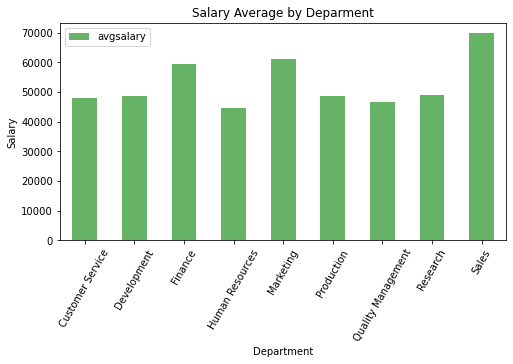

In [70]:
salary_avg.plot( kind="bar",
                       figsize=(8,4),
                       rot=60,
                       title="Salary Average by Deparment",
                       ylabel="Salary",
                       xlabel="Department",
                       color="green", 
                       alpha=0.6
               )
plt.xticks(loc,dep)